In [1]:
import numpy as np
from embedding.array import ArrayEncoder
import matplotlib.pyplot as pl

def labs(k=2):
    return [str(n) for n in range(k)]


def make_array(length, k):
    return list(np.random.choice(labs(k), size=length, replace=True))


encoders = dict()

def stress(dim=500, length=10, k=2, n=1000):
    if (dim, k) in encoders:
        ae = encoders[(dim, k)]
    else:
        ae = ArrayEncoder(labels=labs(k), dim=dim, seed=None)
        encoders[(dim, k)] = ae
    good = 0
    bad = 0

    for _ in range(n):
        a = make_array(length, k)
        v = ae.encode(a)

        b = ae.decode(v)

        if b is None:
            bad += 1
            continue
        else:
            success = np.all(a == b)

        good += success
        bad += not success

    return good, bad, good / (good + bad)



In [3]:
dims = range(2000,40,-10)
lens = range(1,50)
N = 100
res = np.zeros((len(dims)*len(lens),4))
i = 0

for Z in dims:
    all_bad = 0
    for L in lens:
       g, b, _ = stress(Z,L,100,N)
       print(Z, L, g, b)
       res[i] = Z,L,g,b
       i += 1
       if g == 0:
           all_bad += 1
           if all_bad >5:
               break
       else:
           all_bad = 0
               
res = res[:i]

200 1 100 0
200 2 100 0
200 3 100 0
200 4 100 0
200 5 89 11
200 6 83 17
200 7 65 35
200 8 48 52
200 9 37 63
200 10 24 76
200 11 12 88
200 12 7 93
200 13 3 97
200 14 0 100
200 15 0 100
200 16 0 100
200 17 0 100
200 18 0 100
200 19 0 100
190 1 100 0
190 2 100 0
190 3 99 1
190 4 98 2
190 5 92 8
190 6 80 20
190 7 64 36
190 8 40 60
190 9 30 70
190 10 22 78
190 11 10 90
190 12 6 94
190 13 0 100
190 14 0 100
190 15 1 99
190 16 0 100


KeyboardInterrupt: 

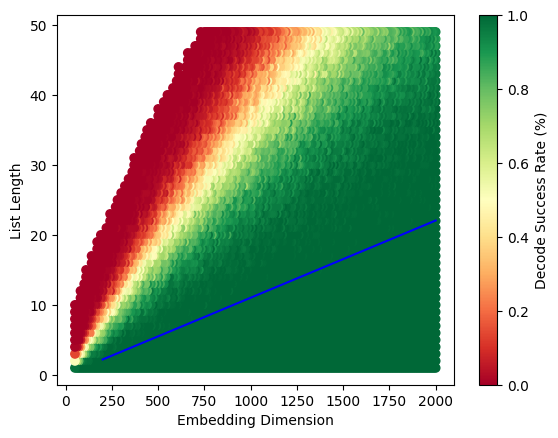

In [19]:
rr = res[res[:,3]!=0]
sl = min(rr[:,1]/rr[:,0])

pl.scatter(res[:,0],res[:,1], c=res[:,2]/(res[:,2]+res[:,3]), cmap='RdYlGn')
pl.colorbar().set_label('Decode Success Rate (%)')
pl.xlabel('Embedding Dimension')
pl.ylabel('List Length')

x_limits = pl.gca().get_xlim()
y_limits = pl.gca().get_ylim()
pl.plot((200,2000),
        (200*sl, 2000*sl), 
        color='#0000FF')
pl.xlim(x_limits)
pl.ylim(y_limits)
pl.savefig('rand_lists.png', dpi=300)


In [22]:
np.save('rand_lists.npy', res)